In [2]:
%matplotlib inline
import sklearn
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as pltimg


In [3]:
import os
import re

In [59]:
dataset = {
    (folder_name,int(re.findall(r"\d\d\d\d",file_name)[0])): "lfw/%s/%s" % (folder_name,file_name)
    for folder_name in os.listdir("dataset/lfw/")
    for file_name in os.listdir("dataset/lfw/"+folder_name)
}
#dataset[('Mehdi_Ghanimifard','1')] = 'dataset/lfw/Mehdi_Ghanimifard/Mehdi_Ghanimifard_0001.jpg'

In [6]:
import pickle

In [22]:
with open('dataset/embeddings/embeddings_align', 'rb') as f:
    embeddings = pickle.load(f, encoding='latin1')

In [12]:
with open('dataset/embeddings/imgpaths', 'rb') as f:
    imgpaths = pickle.load(f)

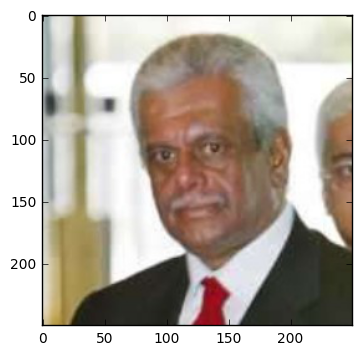

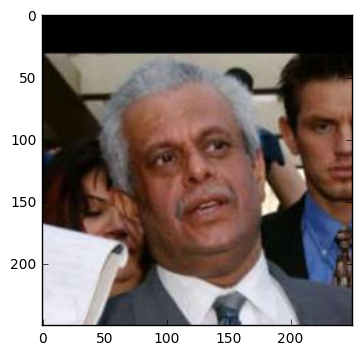

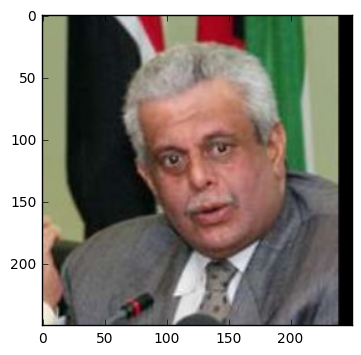

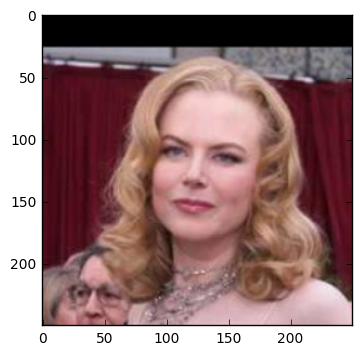

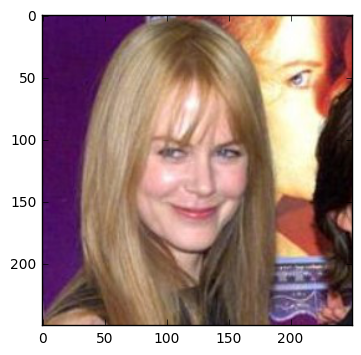

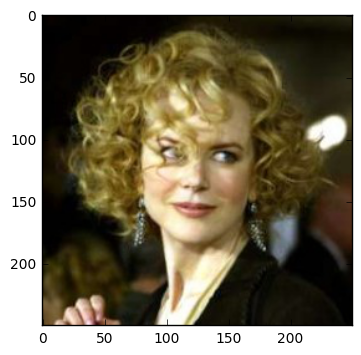

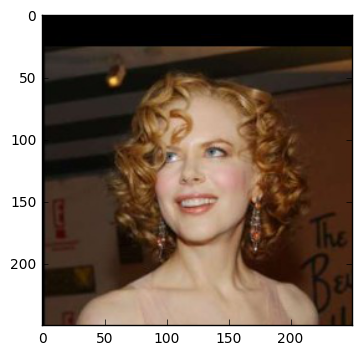

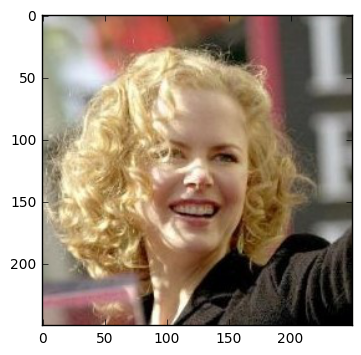

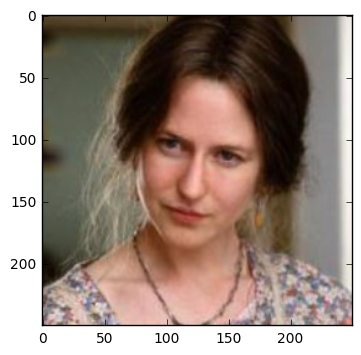

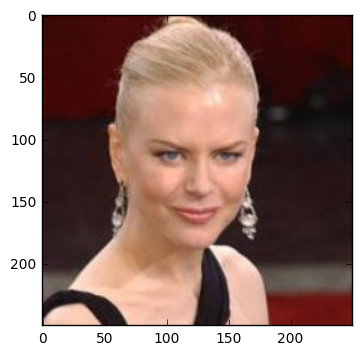

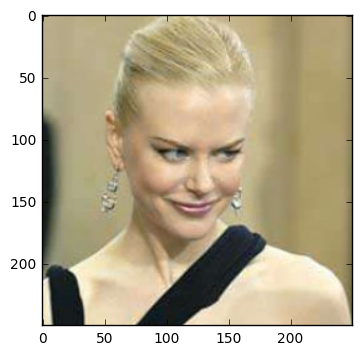

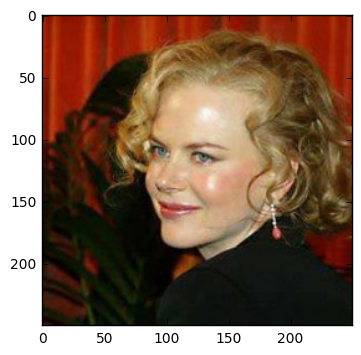

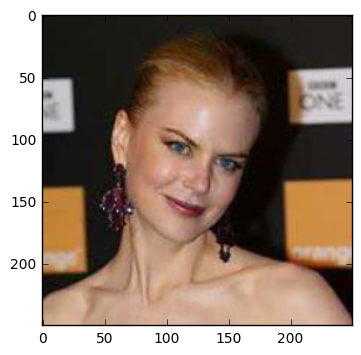

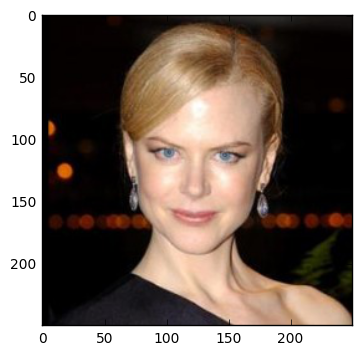

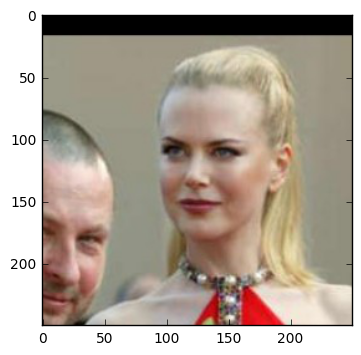

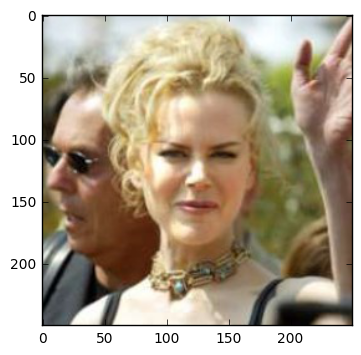

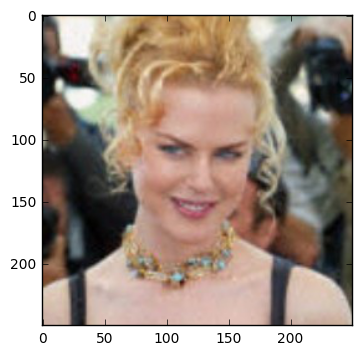

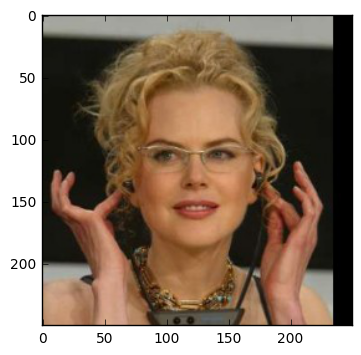

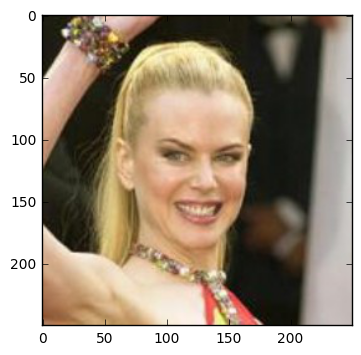

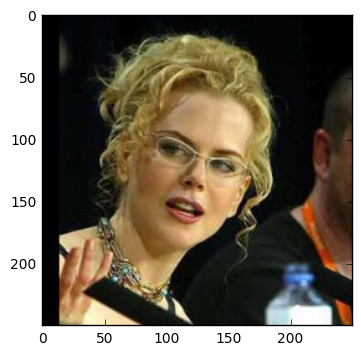

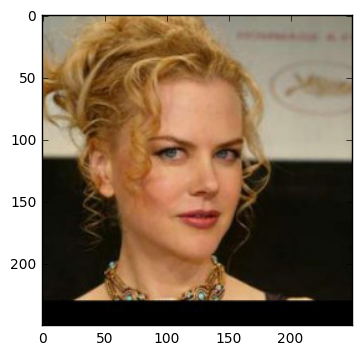

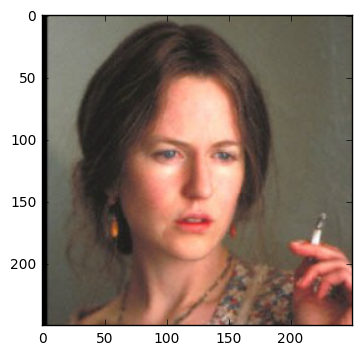

In [29]:
import cv2
a = []
b = []
for index, path in enumerate(imgpaths):
    #print(path, emb[index])
    if 'Abdullah_al-Attiyah' in path:
        a.append(embeddings[index])
        img = cv2.cvtColor(cv2.imread("dataset/"+path,), cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.show()
    
    if 'Nicole_Kidman' in path:
        b.append(embeddings[index])
        img = cv2.cvtColor(cv2.imread("dataset/"+path,), cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.show()
    


In [32]:
len(a), len(b)

(3, 19)

In [33]:
np.dot(a[0], a[1])

0.75514348269564402

In [34]:
np.dot(b[0], b[1])

0.60481267046425546

In [35]:
for ai in a:
    np.dot(ai, b[0]),
    np.dot(a[1], b[0]),
    np.dot(a[2], b[0]),
)    

-0.091396912212961756

In [36]:
with open('dataset/embeddings/embeddings', 'rb') as f:
    embeddings_tricky = pickle.load(f, encoding='latin1')

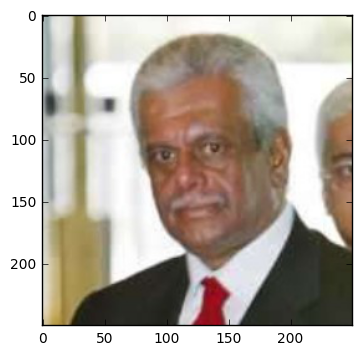

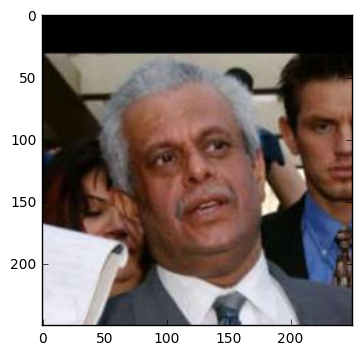

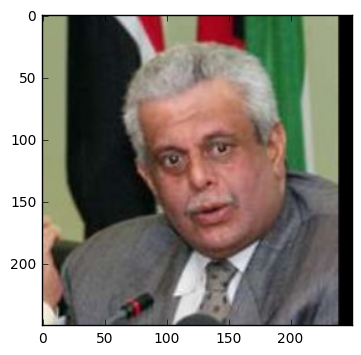

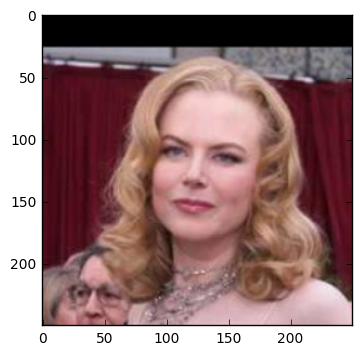

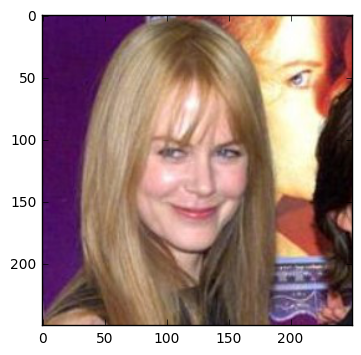

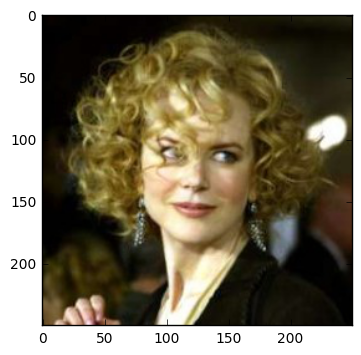

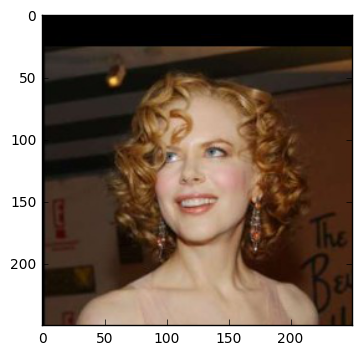

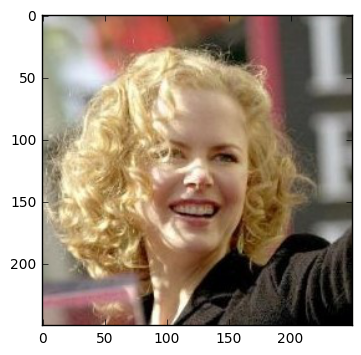

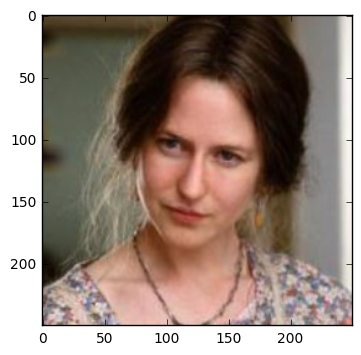

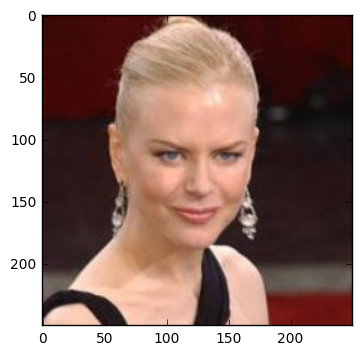

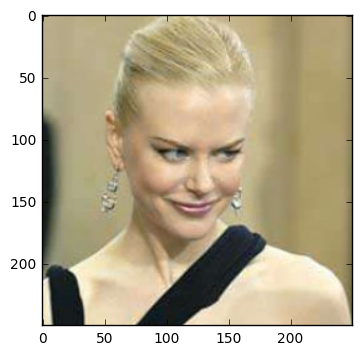

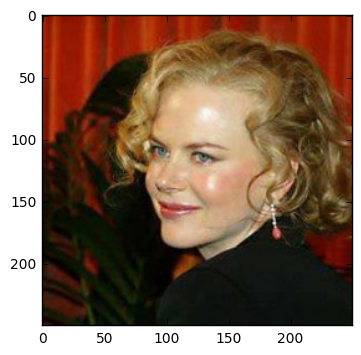

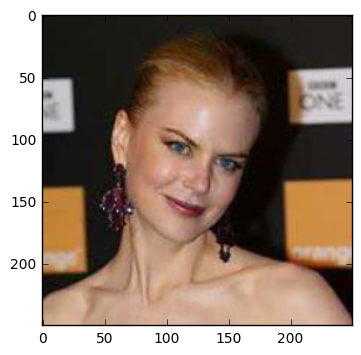

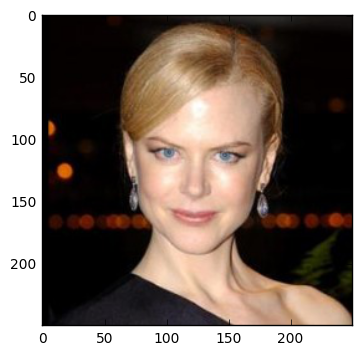

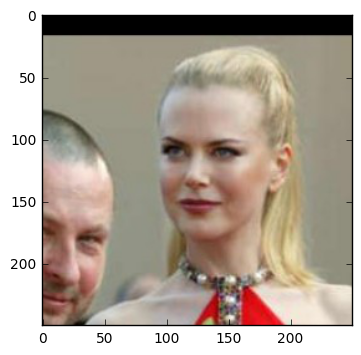

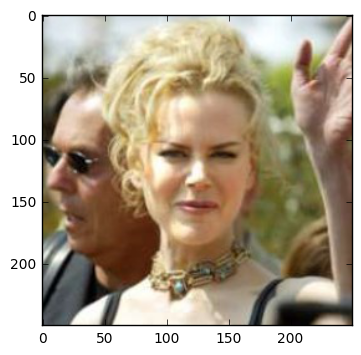

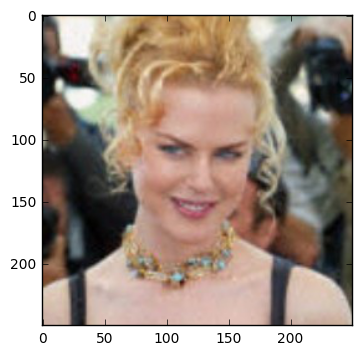

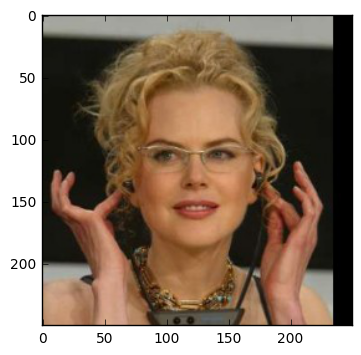

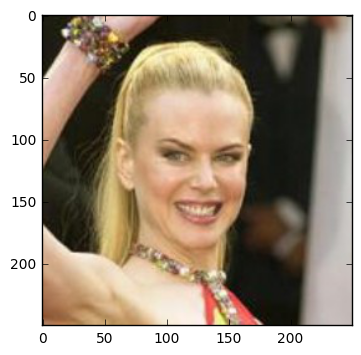

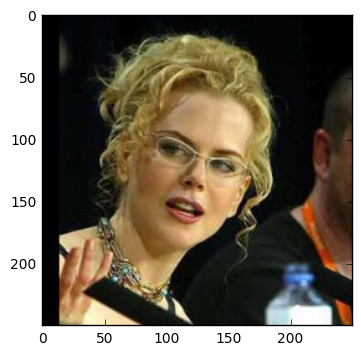

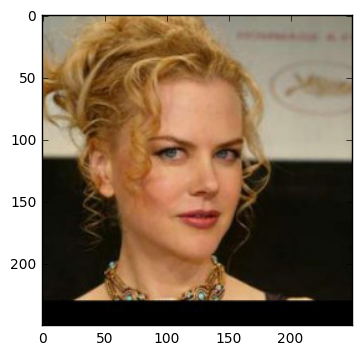

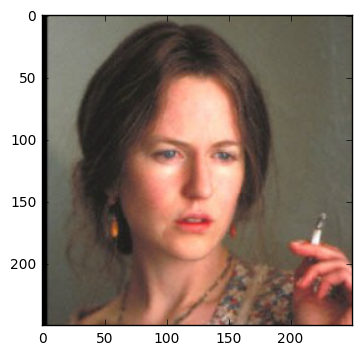

In [37]:
a_tricky = []
b_tricky = []
for index, path in enumerate(imgpaths):
    #print(path, emb[index])
    if 'Abdullah_al-Attiyah' in path:
        a_tricky.append(embeddings_tricky[index])
        img = cv2.cvtColor(cv2.imread("dataset/"+path,), cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.show()
    
    if 'Nicole_Kidman' in path:
        b_tricky.append(embeddings_tricky[index])
        img = cv2.cvtColor(cv2.imread("dataset/"+path,), cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.show()
    


In [39]:
np.dot(a_tricky[0], a_tricky[1])

0.40829780197928806

0.99999992899884482

In [50]:
np.sum(np.abs(a[0]))

8.9909805213101208

In [51]:
from sklearn import svm

In [67]:

# understand this
for (name, num), address in dataset.items():
    print((name, num))
    print(imgpaths.index(address))
    print(embeddings[num])
    break

# reading attributes
dataset_att = dict()
with open('dataset/lfw_attributes.txt') as att_file:
    for index, line in enumerate(att_file):
        items = line.split('\t')
        if index == 1:
            attributes = items[3:]
        if index > 1:
            dataset_att[dataset[(items[0].replace(' ', '_'), int(items[1]))]] = np.array(items[2:]).astype(np.float)

('Eric_Clapton', 2)
3458
[ -1.69996638e-02   8.44062939e-02   1.82949796e-01   9.88334343e-02
   1.26972973e-01   9.70787555e-02  -1.27938418e-02  -1.08472750e-01
  -5.54483607e-02  -1.26878880e-02  -1.80496438e-03   1.91392377e-02
  -8.35598111e-02  -1.02886942e-03   1.29671350e-01   5.48063777e-02
   1.78829469e-02   1.14648290e-01  -5.51196225e-02  -1.82358697e-02
   1.86003018e-02  -1.73031818e-02   4.08934280e-02  -6.91808807e-03
   1.56447992e-01  -1.18407562e-01  -1.05708629e-01   5.77115640e-02
  -3.48198228e-02  -2.68784929e-02   9.18314606e-02   9.97621715e-02
   7.19245736e-06   9.92639735e-02   9.24847126e-02   9.13482457e-02
  -9.50288959e-03  -1.15325488e-01   1.48012871e-02  -1.44197688e-01
   7.53017515e-02  -4.20110114e-02   1.62899971e-01  -1.19278342e-01
  -2.45333072e-02   4.88602109e-02   4.34599482e-02  -4.92976792e-03
  -1.60930827e-01   4.99300146e-03   2.41134297e-02  -4.79957387e-02
  -6.95900805e-03  -6.24494925e-02   3.58107947e-02   4.88245897e-02
  -1.1380

In [68]:
print(list(dataset_att.items())[0], len(list(dataset_att.items())[0][1]))

('lfw/Alicia_Hollowell/Alicia_Hollowell_0001.jpg', array([ 0.93077793, -1.34796973,  0.51308155, -2.10132266, -2.37598428,
       -1.79867252,  0.34550633, -0.03690139, -0.54884206, -1.46298487,
       -0.90445178,  0.25931928, -0.6365708 , -0.07305445, -0.37488381,
       -1.15533594, -0.93756599, -0.40439242,  0.3218703 , -1.03189645,
        0.09515627, -0.09483338, -0.92369027,  0.58094539,  0.69200073,
        0.68894737, -0.15142938, -1.11839671,  0.1742338 , -0.22226355,
       -0.22145631,  1.52419459, -0.50984497, -0.17952252, -0.47907955,
       -1.8920444 ,  1.96203882, -0.69532633,  1.17277276, -0.00455569,
       -0.45882397, -0.7714901 ,  0.00503753, -1.05741904, -0.0490901 ,
        0.46181329, -0.09614261,  0.0787738 , -0.60694741, -0.78663252,
        1.01390675, -0.3271452 , -0.86737976,  4.36628688, -0.19362982,
        0.44482677, -0.57082361, -1.04782377, -0.54489863, -0.09500381,
       -1.13506305,  0.03608097, -1.00820349, -0.44318547, -0.38525054,
        0.715

In [70]:
attributes

['Male',
 'Asian',
 'White',
 'Black',
 'Baby',
 'Child',
 'Youth',
 'Middle Aged',
 'Senior',
 'Black Hair',
 'Blond Hair',
 'Brown Hair',
 'Bald',
 'No Eyewear',
 'Eyeglasses',
 'Sunglasses',
 'Mustache',
 'Smiling',
 'Frowning',
 'Chubby',
 'Blurry',
 'Harsh Lighting',
 'Flash',
 'Soft Lighting',
 'Outdoor',
 'Curly Hair',
 'Wavy Hair',
 'Straight Hair',
 'Receding Hairline',
 'Bangs',
 'Sideburns',
 'Fully Visible Forehead',
 'Partially Visible Forehead',
 'Obstructed Forehead',
 'Bushy Eyebrows',
 'Arched Eyebrows',
 'Narrow Eyes',
 'Eyes Open',
 'Big Nose',
 'Pointy Nose',
 'Big Lips',
 'Mouth Closed',
 'Mouth Slightly Open',
 'Mouth Wide Open',
 'Teeth Not Visible',
 'No Beard',
 'Goatee',
 'Round Jaw',
 'Double Chin',
 'Wearing Hat',
 'Oval Face',
 'Square Face',
 'Round Face',
 'Color Photo',
 'Posed Photo',
 'Attractive Man',
 'Attractive Woman',
 'Indian',
 'Gray Hair',
 'Bags Under Eyes',
 'Heavy Makeup',
 'Rosy Cheeks',
 'Shiny Skin',
 'Pale Skin',
 "5 o' Clock Shadow",
 '

In [80]:
len(dataset_att), len(dataset)

(13143, 13233)

In [87]:
# features for all classifiers: ~13000 data points
# for each file you have a vector of features:

# fix this: there are some datapoints missing
# Mehdi: I just wrote a fix for missing images in attribute dataset. There is still a minor work left here:
X = [
    embeddings[imgpaths.index(address)]
    for _, address in dataset.items()
    if address in dataset_att and True # replace True with "not being skipped"
]

# 73 classifiers (each have their own y)
# for each classifier (attribute):
# for each file:
#  either {-1, 1}
Y = [
    [
        1 if dataset_att[address][i] > 0 else -1
        for _, address in dataset.items()
        if address in dataset_att and True # replace True with "not being skipped"
    ]
    for i, att_name in enumerate(attributes)
]

# make train, test, dev split

In [84]:
len(X), len(Y[0])

(13143, 13143)

In [82]:
# for each classifier y, write a svm model
# fit parameters of the model based on (X, y)